# Analysis of the Causes of Aircraft Crashes by NLP

In [ ]:
pip install numpy==1.19.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string

from wordcloud import WordCloud

import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('f-16.csv')

In [3]:
df.head()

,Date,Type,Details,Unnamed: 3
0,Oct-80,F-16A,The aircraft crash landed on Rogers dry lake b...,NaN
1,Unknown,F-16A Block 1,\t\nSuffered a mishap on landing. The nose ge...,NaN
2,Nov-89,F-16A Block 1,Engine turbine failed during a take-off roll s...,NaN
3,Feb-85,F-16A Block 1,"Destroyed near Luke AFB, Arizona at Gila Bend ...",NaN
4,Oct-79,F-16A Block 1,Crashed in Nevada due to an engine problem. An...,NaN


In [4]:
df.drop('Unnamed: 3', axis=1, inplace = True)

In [5]:
df.head()

,Date,Type,Details
0,Oct-80,F-16A,The aircraft crash landed on Rogers dry lake b...
1,Unknown,F-16A Block 1,\t\nSuffered a mishap on landing. The nose ge...
2,Nov-89,F-16A Block 1,Engine turbine failed during a take-off roll s...
3,Feb-85,F-16A Block 1,"Destroyed near Luke AFB, Arizona at Gila Bend ..."
4,Oct-79,F-16A Block 1,Crashed in Nevada due to an engine problem. An...


In [6]:
df.sample(8)

,Date,Type,Details
222,Sep-92,F-16C Block 30A,This was the aircraft which crashed due to the...
186,Feb-14,F-16C Block 25D,Aircrew was practicing low approaches and impa...
283,Oct-90,F-16C Block 30E,"\t\n\t\nCrashed 60 miles northeast of Taegu, ..."
95,Jan-84,F-16A Block 15E,\t\n\t\nDestroyed in a crash on Utah Test & T...
167,Oct-01,F-16C Block 25C,Major Yarema Sos ejected while the landing gea...
123,Jun-84,F-16A Block 15M,"\t\n\t\nImpacted the ground near Vilaruengo, ..."
85,May-83,F-16A Block 15C,\t\n\t\nAircraft was number two in a two-ship...
389,Sep-11,F-16C Block 42E,"Storm hit Nellis AFB, Nevada on September 8, 2..."


In [7]:
df.isnull().sum()

Date       0
Type       0
Details    8
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     500 non-null    object
 1   Type     500 non-null    object
 2   Details  492 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [9]:
df.shape

(500, 3)

In [10]:
df.Type.value_counts()

F-16C Block 40C        15
F-16C Block 30D        14
F-16C Block 30E        12
F-16C Block 25D        12
F-16C Block 30B        12
                       ..
F-16D Block 50B         1
F-16B Block 15Q         1
F-16B Block 15K ADF     1
F-16D Block 25A         1
F-16B Block 15S         1
Name: Type, Length: 137, dtype: int64

In [11]:
df.Date.value_counts()

Unknown    16
Jan-91     12
Sep-11      7
Feb-91      6
Feb-94      5
           ..
May-83      1
1-Nov       1
Apr-01      1
Mar-09      1
Jun-97      1
Name: Date, Length: 269, dtype: int64

In [12]:
df['Year'] = df['Date'].astype(str).str[4:6]

In [13]:
df.head()

,Date,Type,Details,Year
0,Oct-80,F-16A,The aircraft crash landed on Rogers dry lake b...,80
1,Unknown,F-16A Block 1,\t\nSuffered a mishap on landing. The nose ge...,ow
2,Nov-89,F-16A Block 1,Engine turbine failed during a take-off roll s...,89
3,Feb-85,F-16A Block 1,"Destroyed near Luke AFB, Arizona at Gila Bend ...",85
4,Oct-79,F-16A Block 1,Crashed in Nevada due to an engine problem. An...,79


In [48]:
df['Month'] = df['Date'].astype(str).str[0:3]

In [49]:
df.head()

,Date,Type,Details,Year,Month
0,Oct-80,F-16A,aircraft crash landed rogers dry lake bed edwa...,80,Oct
1,Unknown,F-16A Block 1,suffered mishap landing nose gear would come p...,ow,Unk
2,Nov-89,F-16A Block 1,engine turbine failed roll sending piece turbi...,89,Nov
3,Feb-85,F-16A Block 1,destroyed near luke afb arizona gila bend auxi...,85,Feb
4,Oct-79,F-16A Block 1,crashed nevada due engine problem mot e aircra...,79,Oct


In [14]:
df.Year.value_counts()

91    33
93    27
88    24
92    23
98    20
90    19
82    18
89    18
ow    16
94    16
00    15
97    15
99    15
87    14
95    13
01    13
11    12
04    12
06    12
86    12
03    12
96    12
05    12
02    11
85    11
83    10
84    10
07     9
13     8
09     8
14     6
81     5
12     5
80     5
15     5
08     4
16     4
17     3
10     3
79     2
19     2
18     2
g      1
c      1
v      1
l      1
Name: Year, dtype: int64

In [15]:
df.shape

(500, 4)

In [16]:
df = df[df['Details'].notna()]

In [17]:
df.shape

(492, 4)

**Text Mining**

In [18]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.lower())   #removed the .lower intentionaly to keep NNP s
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [19]:
df['Details'] = df['Details'].apply(cleaning)

In [20]:
df.head()

,Date,Type,Details,Year
0,Oct-80,F-16A,aircraft crash landed rogers dry lake bed edwa...,80
1,Unknown,F-16A Block 1,suffered mishap landing nose gear would come p...,ow
2,Nov-89,F-16A Block 1,engine turbine failed roll sending piece turbi...,89
3,Feb-85,F-16A Block 1,destroyed near luke afb arizona gila bend auxi...,85
4,Oct-79,F-16A Block 1,crashed nevada due engine problem mot e aircra...,79


**Word Cloud**

In [21]:
reports =[]

for review in df.Details:
    reports.append(review) 
reports = ' '.join(reports)
reports[:200]

'aircraft crash landed rogers dry lake bed edward afb due blown nose gear tire take annual open house air show shipped general dynamic fort worth rebuilt first flying back edward one year later decembe'

In [22]:
len(reports)

105415

In [23]:
from wordcloud import WordCloud

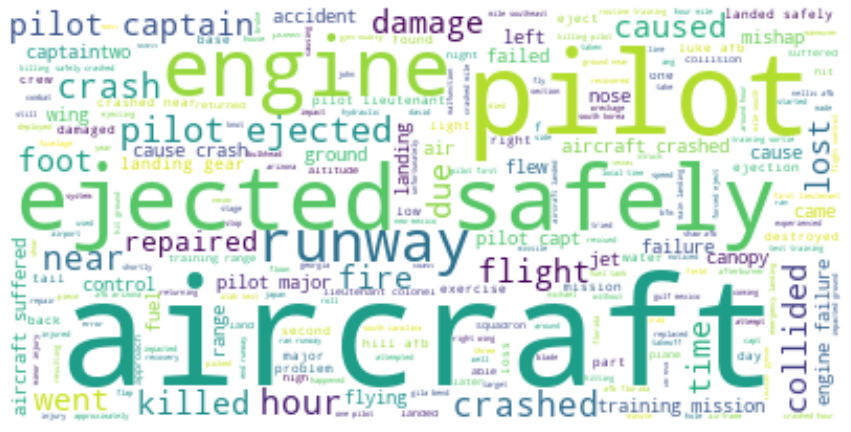

In [24]:
wordcloud = WordCloud(background_color="white", max_words=len(reports))

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
wordcloud.to_file("WC_F-16-report-1.png")

In [25]:
reports.count('aircraft')

532

In [26]:
reports = reports.replace('aircraft', '')

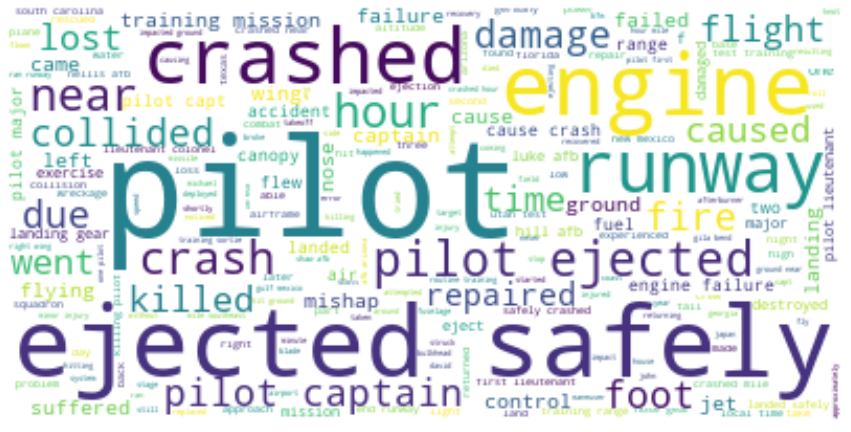

In [27]:
wordcloud = WordCloud(background_color="white", max_words=len(reports))

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
wordcloud.to_file("WC_F-16_aircraft-report-2.png")

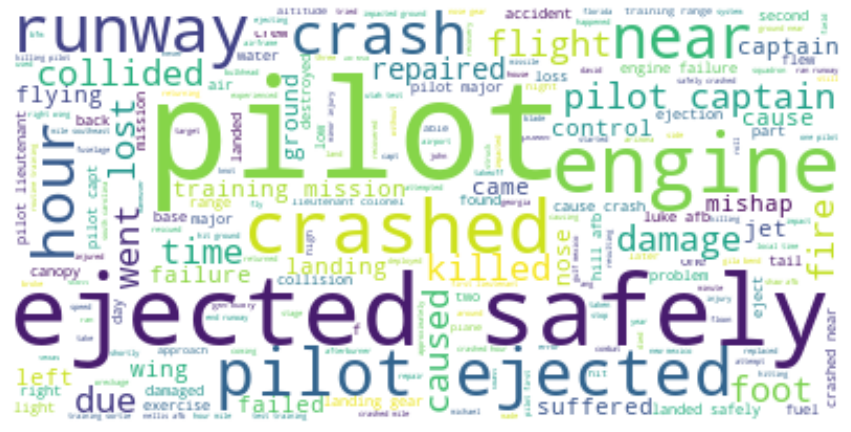

In [29]:
wordcloud = WordCloud(background_color="white", max_words=200)

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
wordcloud.to_file("WC_F-16_aircraft-report-3_200words.png")

In [32]:
from collections import Counter
most_common_words = Counter(" ".join(df["Details"]).split()).most_common(20)
most_common_words

[('aircraft', 532),
 ('pilot', 517),
 ('ejected', 220),
 ('safely', 201),
 ('crashed', 177),
 ('engine', 172),
 ('afb', 150),
 ('runway', 120),
 ('hour', 116),
 ('near', 111),
 ('training', 101),
 ('crash', 98),
 ('mile', 96),
 ('landing', 91),
 ('captain', 91),
 ('cause', 82),
 ('ground', 80),
 ('flight', 76),
 ('failure', 73),
 ('gear', 70)]

**Word Cloud - Year Analysis**

In [39]:
counts = df['Year'].value_counts()

In [42]:
counts = counts.replace('ow', '')

In [43]:
counts.index = counts.index.map(str)

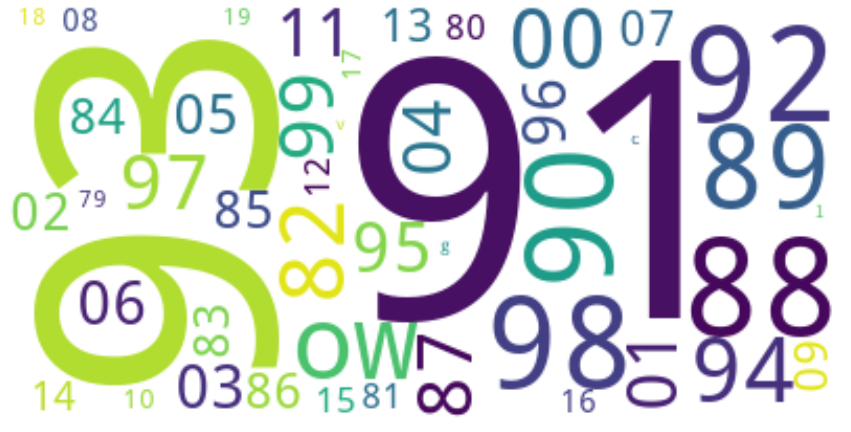

In [44]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(counts)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Word Cloud - Month Analysis**

In [57]:
df.Month.value_counts()

Jun    52
Jan    50
Mar    44
Sep    44
Nov    40
Oct    39
Jul    37
May    35
Feb    34
Apr    34
Aug    32
Dec    31
Unk    16
1-D     1
1-J     1
1-A     1
1-N     1
Name: Month, dtype: int64

In [ ]:
mm =[]

for review in df.Month:
    mm.append(review) 
mm = ' '.join(mm)
mm[:200]

In [62]:
mm = mm.replace('Unk', '')

In [64]:
mm[:200]

'Oct  Nov Feb Oct Jan Jan Apr Apr Mar Mar Mar Mar Mar Aug Jan Feb May Jun Jun Oct Aug Oct Jul May    Mar Oct Mar Jul Nov May Jun Apr Apr Jan Feb Sep Dec Jul May  Feb Apr Jun Jan May Jan Apr Mar Jun Jan'

In [68]:
len(mm)

1907

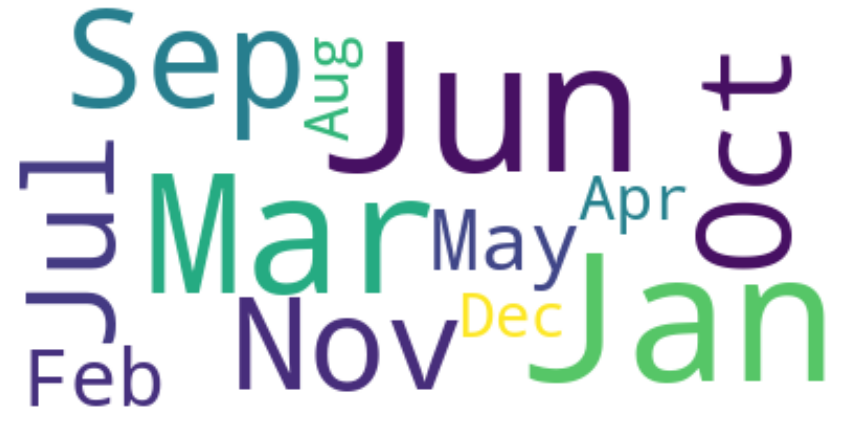

In [74]:
wordcloud = WordCloud(background_color="white", max_words=len(mm))

wordcloud.generate(mm)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [80]:
df.Month.value_counts()

Jun    52
Jan    50
Mar    44
Sep    44
Nov    40
Oct    39
Jul    37
May    35
Feb    34
Apr    34
Aug    32
Dec    31
Unk    16
1-D     1
1-J     1
1-A     1
1-N     1
Name: Month, dtype: int64


In [75]:
wordcloud.to_file("WC_F-16-month-1.png")